In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Quedtion 01
#Intensity Transformation
# Import Emma image
emma = cv.imread(r'D:\ACA\sem 5\vision\assignment 1\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

Lookup Table Shape: (256,)


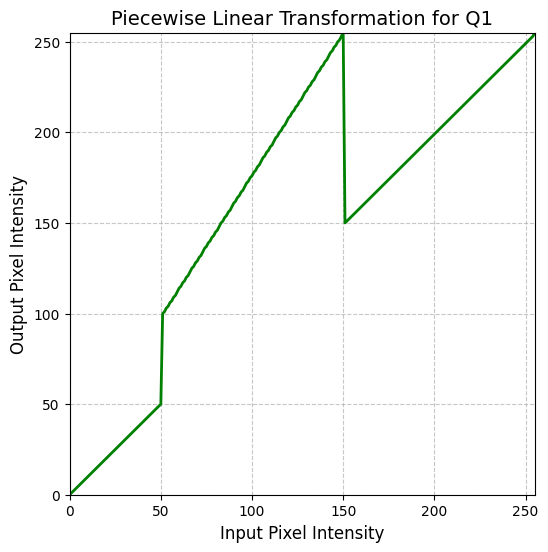

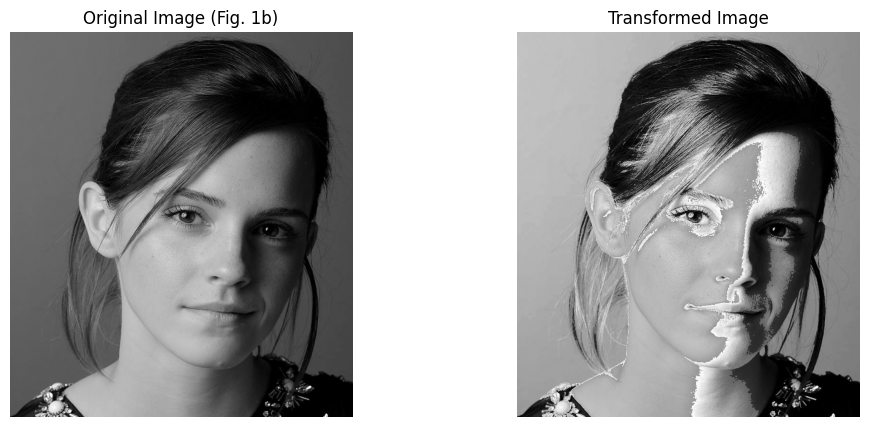

In [22]:
# Create a piecewise linear transformation for intensity mapping
# Segment 1: Maps 0-50 to 0-50 (no change for low intensities)
# Segment 2: Maps 51-150 to 100-255 (stretches mid-range intensities)
# Segment 3: Maps 151-255 to 150-255 (compresses high intensities)
segment_low = np.linspace(0, 50, num=51).astype(np.uint8)  # First 51 intensities
segment_mid = np.linspace(100, 255, num=100).astype(np.uint8)  # Next 100 intensities
segment_high = np.linspace(150, 255, num=105).astype(np.uint8)  # Last 105 intensities

# Combine segments into a 256-element LUT
intensity_lut = np.concatenate((segment_low, segment_mid, segment_high), axis=0).astype(np.uint8)

# Verify the LUT has 256 values for all input intensities (0-255)
print(f"Lookup Table Shape: {intensity_lut.shape}")

# Plot the transformation curve
plt.figure(figsize=(6, 6))
plt.plot(intensity_lut, color='green', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Piecewise Linear Transformation for Q1", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q1_transform_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Apply the piecewise transformation using the LUT
transformed_image = cv.LUT(emma, intensity_lut)

# Visualize original and transformed images side by side
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.title("Original Image (Fig. 1b)", fontsize=12)
plt.axis('off')
plt.subplot(122)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image", fontsize=12)
plt.axis('off')
plt.savefig('q1_image_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
#Question 02
#Intensity Transformation to Accenuate White Matter and Gray Matter
# Import brain image
brain = cv.imread(r'D:\ACA\sem 5\vision\assignment 1\a1images\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

Gray Matter LUT Shape: (256,)
White Matter LUT Shape: (256,)


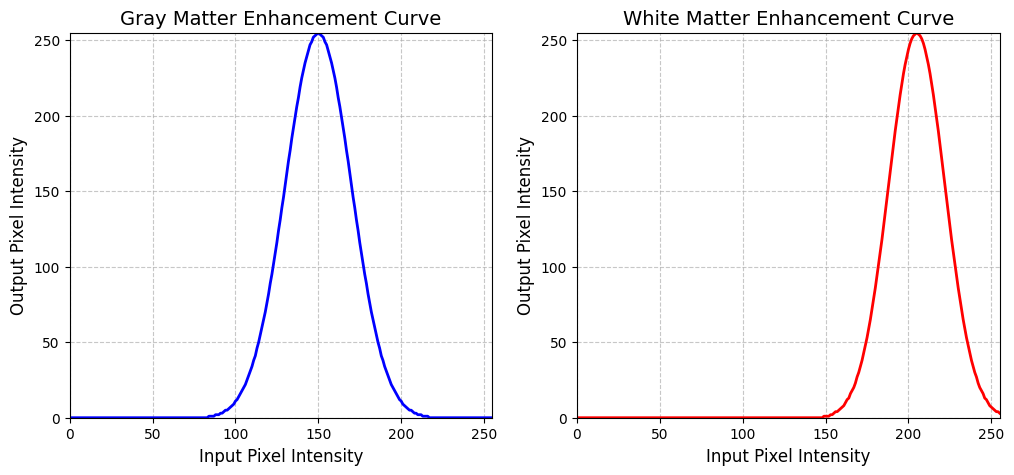

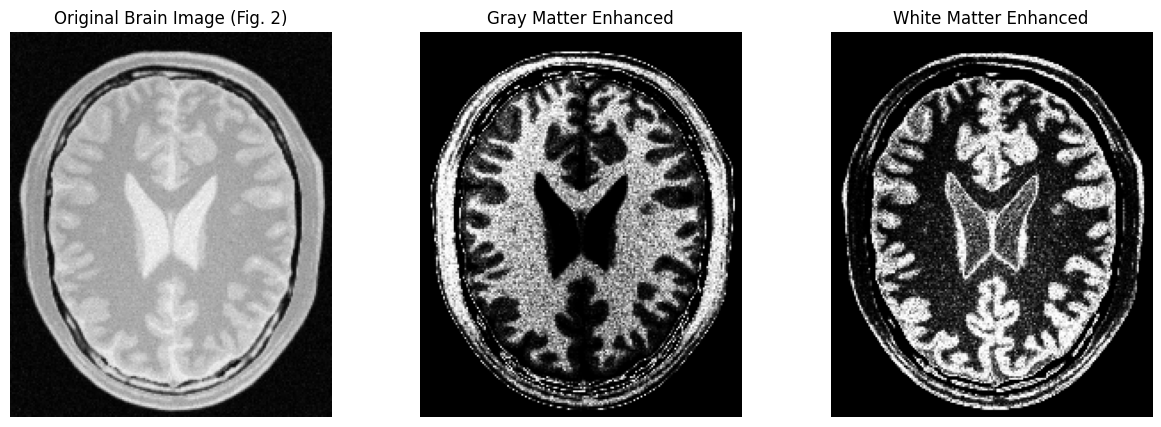

In [25]:
# Create transformation for gray matter using a Gaussian pulse
# Centers at intensity 150 to boost mid-range intensities (gray matter)
gray_center = 150  # Mean of Gaussian, targeting gray matter
gray_spread = 20  # Standard deviation for Gaussian spread
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)
gray_lut = 255 * np.exp(-((input_intensities - gray_center)**2) / (2 * gray_spread**2))  # Gaussian pulse
gray_lut = np.clip(gray_lut, 0, 255).astype(np.uint8)  # Clip to valid intensity range [0, 255]

# Create transformation for white matter using a Gaussian pulse
# Centers at intensity 200 to boost mid-range intensities (gray matter)
white_center = 205  # Mean of Gaussian, targeting gray matter
white_spread = 17  # Standard deviation for Gaussian spread
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)
white_lut = 255 * np.exp(-((input_intensities - white_center)**2) / (2 * white_spread**2))  # Gaussian pulse
white_lut = np.clip(white_lut, 0, 255).astype(np.uint8)  # Clip to valid intensity range [0, 255]

# Verify transformation array shapes
print(f"Gray Matter LUT Shape: {gray_lut.shape}")
print(f"White Matter LUT Shape: {white_lut.shape}")

# Plot both transformation curves
plt.figure(figsize=(12, 5))
# Plot for gray matter transformation
plt.subplot(121)
plt.plot(input_intensities, gray_lut, color='blue', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Gray Matter Enhancement Curve", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
# Plot for white matter transformation
plt.subplot(122)
plt.plot(input_intensities, white_lut, color='red', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("White Matter Enhancement Curve", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q2_transform_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Apply transformations to enhance gray and white matter
gray_enhanced = cv.LUT(brain, gray_lut)  # Apply Gaussian transform for gray matter
white_enhanced = cv.LUT(brain, white_lut)  # Apply linear transform for white matter

# Visualize original and enhanced images
plt.figure(figsize=(15, 5))
# Original image
plt.subplot(131)
plt.imshow(brain, cmap='gray', vmin=0, vmax=255)
plt.title("Original Brain Image (Fig. 2)", fontsize=12)
plt.axis('off')
# Gray matter enhanced
plt.subplot(132)
plt.imshow(gray_enhanced, cmap='gray', vmin=0, vmax=255)
plt.title("Gray Matter Enhanced", fontsize=12)
plt.axis('off')
# White matter enhanced
plt.subplot(133)
plt.imshow(white_enhanced, cmap='gray', vmin=0, vmax=255)
plt.title("White Matter Enhanced", fontsize=12)
plt.axis('off')
plt.savefig('q2_image_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
#Question 03
#Applying Gamma Correction to the L plane 
#Import the image
img_q3_bgr = cv.imread(r'D:\ACA\sem 5\vision\assignment 1\a1images\highlights_and_shadows.jpg')
assert img_q3_bgr is not None
img_q3_lab = cv.cvtColor(img_q3_bgr, cv.COLOR_BGR2LAB)
img_q3_rgb = cv.cvtColor(img_q3_bgr, cv.COLOR_BGR2RGB)

Shadows LUT Shape (γ=0.5): (256,)
Highlights LUT Shape (γ=2.0): (256,)


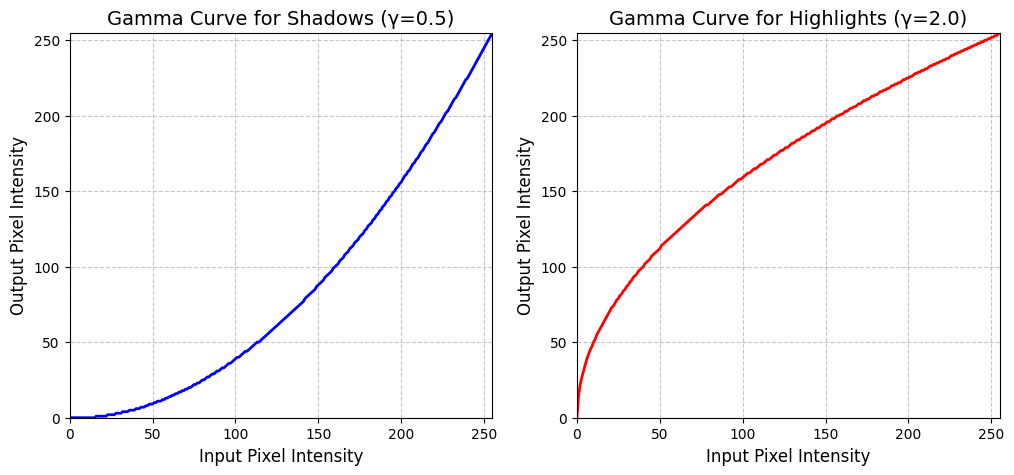

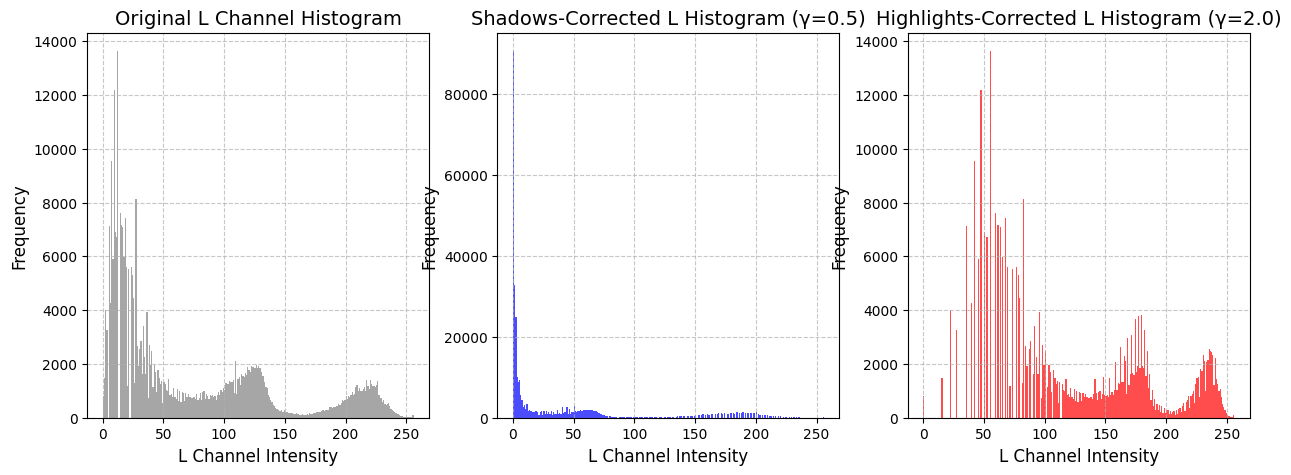

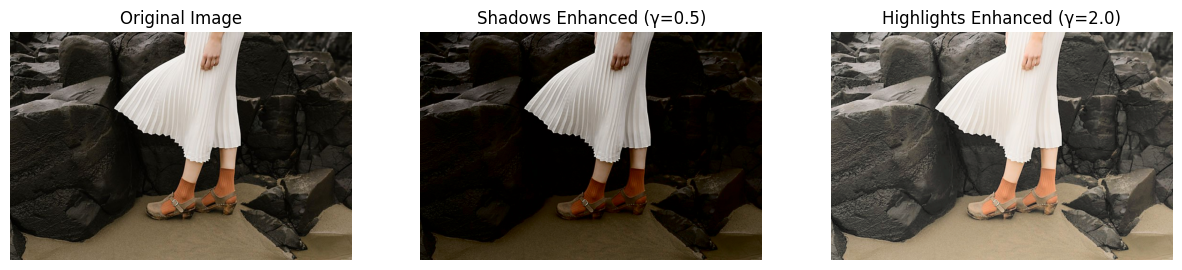

In [8]:
# Extract L, A, B channels from LAB image
l_original, a_channel, b_channel = cv.split(img_q3_lab)  # Split LAB image into L, A, B channels

# Define input intensities for gamma correction LUTs
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)

# Define gamma correction for shadows (γ < 1 to brighten dark areas)
gamma_shadows = 0.5  # Gamma value for shadow enhancement
shadows_lut = 255 * np.power(input_intensities / 255.0, 1.0 / gamma_shadows)  # Gamma correction formula
shadows_lut = np.clip(shadows_lut, 0, 255).astype(np.uint8)  # Clip to valid range [0, 255]

# Define gamma correction for highlights (γ > 1 to enhance bright areas)
gamma_highlights = 2.0  # Gamma value for highlight enhancement
highlights_lut = 255 * np.power(input_intensities / 255.0, 1.0 / gamma_highlights)  # Gamma correction formula
highlights_lut = np.clip(highlights_lut, 0, 255).astype(np.uint8)  # Clip to valid range [0, 255]

# Verify LUT shapes
print(f"Shadows LUT Shape (γ={gamma_shadows}): {shadows_lut.shape}")
print(f"Highlights LUT Shape (γ={gamma_highlights}): {highlights_lut.shape}")

# Plot gamma correction curves
plt.figure(figsize=(12, 5))
# Shadows gamma curve
plt.subplot(121)
plt.plot(input_intensities, shadows_lut, color='blue', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title(f"Gamma Curve for Shadows (γ={gamma_shadows})", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
# Highlights gamma curve
plt.subplot(122)
plt.plot(input_intensities, highlights_lut, color='red', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title(f"Gamma Curve for Highlights (γ={gamma_highlights})", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q3_gamma_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Apply gamma correction to L channel
l_shadows = cv.LUT(l_original, shadows_lut)  # Apply shadows gamma
l_highlights = cv.LUT(l_original, highlights_lut)  # Apply highlights gamma

# Plot histograms of original and corrected L channels
plt.figure(figsize=(15, 5))
# Original L channel histogram
plt.subplot(131)
plt.hist(l_original.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel("L Channel Intensity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Original L Channel Histogram", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
# Shadows-corrected L channel histogram
plt.subplot(132)
plt.hist(l_shadows.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.xlabel("L Channel Intensity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Shadows-Corrected L Histogram (γ={gamma_shadows})", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
# Highlights-corrected L channel histogram
plt.subplot(133)
plt.hist(l_highlights.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.xlabel("L Channel Intensity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Highlights-Corrected L Histogram (γ={gamma_highlights})", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q3_l_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Reconstruct LAB images with modified L channels
lab_shadows = cv.merge([l_shadows, a_channel, b_channel])  # Merge shadows-corrected L with A, B
lab_highlights = cv.merge([l_highlights, a_channel, b_channel])  # Merge highlights-corrected L with A, B

# Convert back to BGR for saving, then to RGB for visualization
bgr_shadows = cv.cvtColor(lab_shadows, cv.COLOR_LAB2BGR)  # Convert LAB to BGR
rgb_shadows = cv.cvtColor(bgr_shadows, cv.COLOR_BGR2RGB)  # Convert to RGB
bgr_highlights = cv.cvtColor(lab_highlights, cv.COLOR_LAB2BGR)  # Convert LAB to BGR
rgb_highlights = cv.cvtColor(bgr_highlights, cv.COLOR_BGR2RGB)  # Convert to RGB

# Save enhanced images
cv.imwrite('q3_shadows_enhanced.jpg', bgr_shadows)  # Save shadows-enhanced image
cv.imwrite('q3_highlights_enhanced.jpg', bgr_highlights)  # Save highlights-enhanced image

# Visualize original and enhanced images
plt.figure(figsize=(15, 5))
# Original image
plt.subplot(131)
plt.imshow(img_q3_rgb)
plt.title("Original Image", fontsize=12)
plt.axis('off')
# Shadows enhanced
plt.subplot(132)
plt.imshow(rgb_shadows)
plt.title(f"Shadows Enhanced (γ={gamma_shadows})", fontsize=12)
plt.axis('off')
# Highlights enhanced
plt.subplot(133)
plt.imshow(rgb_highlights)
plt.title(f"Highlights Enhanced (γ={gamma_highlights})", fontsize=12)
plt.axis('off')
plt.savefig('q3_image_results.png', dpi=300, bbox_inches='tight')
plt.show()

